In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
img_array = cv2.imread("train/0/Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

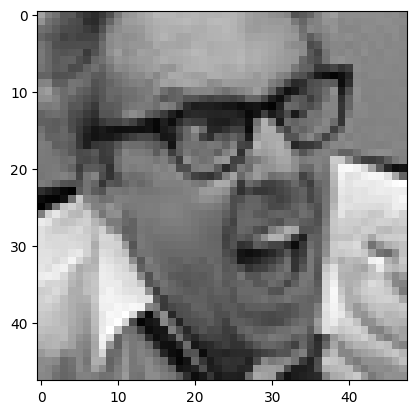

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = "train/"

In [6]:
Classes = ["0","1","2","3","4","5","6"]

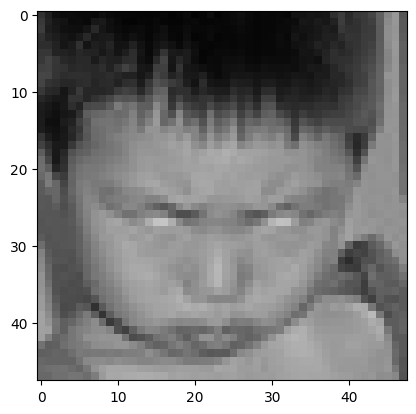

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

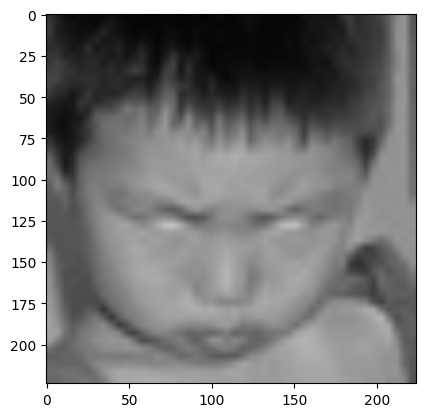

In [8]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [9]:
training_data = []
def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [11]:
create_training_data()

In [12]:
print(len(training_data))

6484


In [13]:
import random
random.shuffle(training_data)

In [14]:
x = [] #data/images as pixel array
y = [] #label
for features,label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3) #converting it to 4d as we are using mobilenet deep learning architechture

In [15]:
x.shape

(6484, 224, 224, 3)

In [16]:
x = x/255.0; #normalizing the data

In [17]:
y = np.array(y)

In [18]:
y.shape

(6484,)

In [61]:
model = tf.keras.applications.MobileNetV2() #pre-trained model

In [21]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [62]:
base_input = model.layers[0].input #input

In [63]:
base_output = model.layers[-2].output

In [24]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [65]:
final_output = layers.Dense(128)(base_output) #adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) #activation function, rectified linear unit
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output) #classes are 7, classification layer, assigns probability to each class

In [26]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [66]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [28]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [67]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]) #calculates cross-entropy between predicted & actual loss

In [30]:
new_model.fit(x, y, epochs = 10)

Epoch 1/10
203/203 [==============================] - 744s 4s/step - loss: 1.5316 - accuracy: 0.4143
Epoch 2/10
203/203 [==============================] - 728s 4s/step - loss: 1.2664 - accuracy: 0.5268
Epoch 3/10
203/203 [==============================] - 724s 4s/step - loss: 1.1425 - accuracy: 0.5680
Epoch 4/10
203/203 [==============================] - 721s 4s/step - loss: 1.0479 - accuracy: 0.6084
Epoch 5/10
203/203 [==============================] - 722s 4s/step - loss: 0.9627 - accuracy: 0.6391
Epoch 6/10
203/203 [==============================] - 731s 4s/step - loss: 0.8896 - accuracy: 0.6676
Epoch 7/10
203/203 [==============================] - 696s 3s/step - loss: 0.8288 - accuracy: 0.6922
Epoch 8/10
203/203 [==============================] - 685s 3s/step - loss: 0.7251 - accuracy: 0.7343
Epoch 9/10
203/203 [==============================] - 688s 3s/step - loss: 0.6748 - accuracy: 0.7565
Epoch 10/10
203/203 [==============================] - 692s 3s/step - loss: 0.6071 - accura

In [31]:
new_model.save('Model_epoch_10.h5')

C:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
frame = cv2.imread("surprised man.jpg") #feeding custom images

In [46]:
frame.shape

(183, 275, 3)

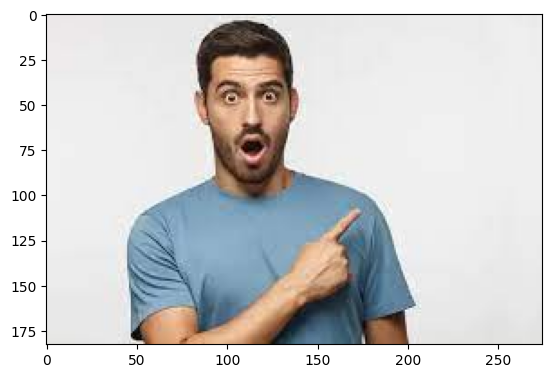

In [47]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [48]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [49]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [50]:
gray.shape

(183, 275, 3)

In [51]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4) #detects multiple faces if present in images. scale factor & minimum neighbours
for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]

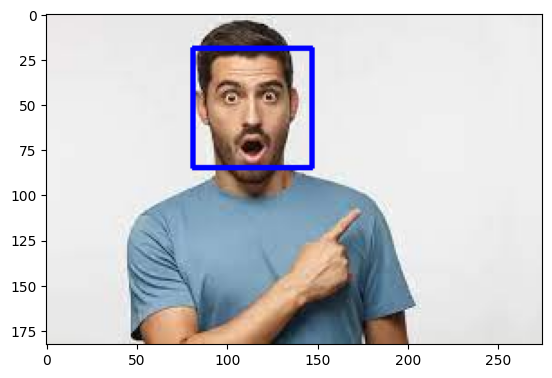

In [52]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

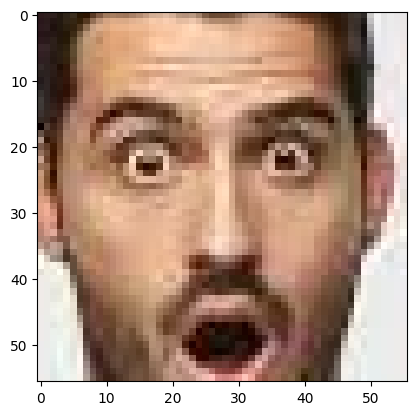

In [53]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [54]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) 
final_image = final_image/255.0

In [55]:
predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 80ms/step


In [56]:
predictions

array([[0.08378811, 0.30657625, 0.14576389, 0.25680655, 0.0640283 ,
        0.05837423, 0.08466266]], dtype=float32)

In [57]:
np.argmax(predictions)

1

In [68]:
Model = tf.keras.models.load_model('Model_epoch_10.h5')

In [71]:
path = 'haarcascase_frontalface_default.xml' #face detection algorithm which has trained weights. Works on gray images. Classifier which identifies face & gives it a face
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)

img = np.zeros((500,500))

#text = "Some text in box"

#(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

#text_offset_x = 10
#text_offset_y = img.shape[0] - 25

#box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
#cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
#cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness = 1)

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]

    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    predictions = Model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(predictions)==0):
        status = "Angry"
        x1, y1, w1, h1 = 0, 0, 175, 75
        #cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))

    elif (np.argmax(predictions)==1):
        status = "Disgust"
        x1, y1, w1, h1 = 0, 0, 175, 75
        #cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        ##cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))

    elif (np.argmax(predictions)==2):
        status = "Fear"
        x1, y1, w1, h1 = 0, 0, 175, 75
        #cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))

    elif (np.argmax(predictions)==3):
        status = "Happy"
        x1, y1, w1, h1 = 0, 0, 175, 75
        #cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))

    elif (np.argmax(predictions)==4):
        status = "Sad"
        x1, y1, w1, h1 = 0, 0, 175, 75
        #cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        ##cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))

    elif (np.argmax(predictions)==5):
        status = "Surprise"
        x1, y1, w1, h1 = 0, 0, 175, 75
        #cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))

    else:
        status = "Neutral"
        x1, y1, w1, h1 = 0, 0, 175, 75
        #cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        #cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))

    cv2.imshow('Face Emotion Recognition', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 61ms/step
